https://haochen23.github.io/2020/04/object-detection-faster-rcnn.html#.Y1buPuzMKWA

In [17]:
# import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import torch
import torchvision.transforms as T
import torchvision
import numpy as np 
import cv2
import warnings
warnings.filterwarnings('ignore')

In [18]:
# load model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
# set to evaluation mode
model.eval()


# load the COCO dataset category names
# we will use the same list for this notebook
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [19]:
def get_prediction(img_path, confidence):
  """
  get_prediction
    parameters:
      - img_path - path of the input image
      - confidence - threshold value for prediction score
    method:
      - Image is obtained from the image path
      - the image is converted to image tensor using PyTorch's Transforms
      - image is passed through the model to get the predictions
      - class, box coordinates are obtained, but only prediction score > threshold
        are chosen.
    
  """
  img = Image.open(img_path)
  transform = T.Compose([T.ToTensor()])
  img = transform(img)
  pred = model([img])
  pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
  pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
  pred_score = list(pred[0]['scores'].detach().numpy())
  pred_t = [pred_score.index(x) for x in pred_score if x>confidence][-1]
  pred_boxes = pred_boxes[:pred_t+1]
  pred_class = pred_class[:pred_t+1]
  return pred_boxes, pred_class


In [20]:
def detect_object(img_path, confidence=0.5, rect_th=2, text_size=2, text_th=2):
  """
  object_detection_api
    parameters:
      - img_path - path of the input image
      - confidence - threshold value for prediction score
      - rect_th - thickness of bounding box
      - text_size - size of the class label text
      - text_th - thichness of the text
    method:
      - prediction is obtained from get_prediction method
      - for each prediction, bounding box is drawn and text is written 
        with opencv
      - the final image is displayed
  """
  boxes, pred_cls = get_prediction(img_path, confidence)
  # print(boxes)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # # print(len(boxes))
  for i in range(len(boxes)):
    c1, c2 = boxes[i]
    cv2.rectangle(img, (int(c1[0]),int(c1[1])), (int(c2[0]),int(c2[1])),color=(0, 255, 0), thickness=rect_th)
    cv2.putText(img,pred_cls[i], (int(c1[0]),int(c1[1])), cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
  plt.figure(figsize=(20,30))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

2022-10-24 15:13:00 URL:https://storage.needpix.com/rsynced_images/pedestrian-zone-456909_1280.jpg [409534/409534] -> "pedestrian.jpg" [1]
[[(237.82071, 58.362103), (467.61176, 722.7958)], [(1020.17926, 156.14558), (1176.579, 506.6857)], [(525.2866, 142.86266), (686.0433, 646.1781)], [(795.94916, 114.412575), (968.38727, 675.17737)], [(1162.8079, 187.61703), (1253.7969, 464.09915)], [(1195.6132, 232.04384), (1252.7332, 335.76538)], [(631.30426, 435.8306), (724.8695, 571.4086)], [(742.92566, 246.74127), (788.3784, 376.41733)], [(713.3826, 266.87466), (744.31104, 372.52518)], [(159.3053, 320.31628), (244.90898, 422.34454)], [(0.0, 305.42816), (24.79107, 366.16873)], [(951.52936, 246.78957), (983.0876, 330.58243)], [(119.24503, 303.94025), (138.64293, 353.44708)], [(503.20044, 277.89078), (522.7697, 330.65833)], [(672.97144, 278.9871), (692.65466, 356.91708)], [(105.11446, 297.92426), (120.74743, 335.90652)], [(663.4722, 272.91568), (689.78876, 366.35428)], [(1233.3501, 301.2258), (1279.6

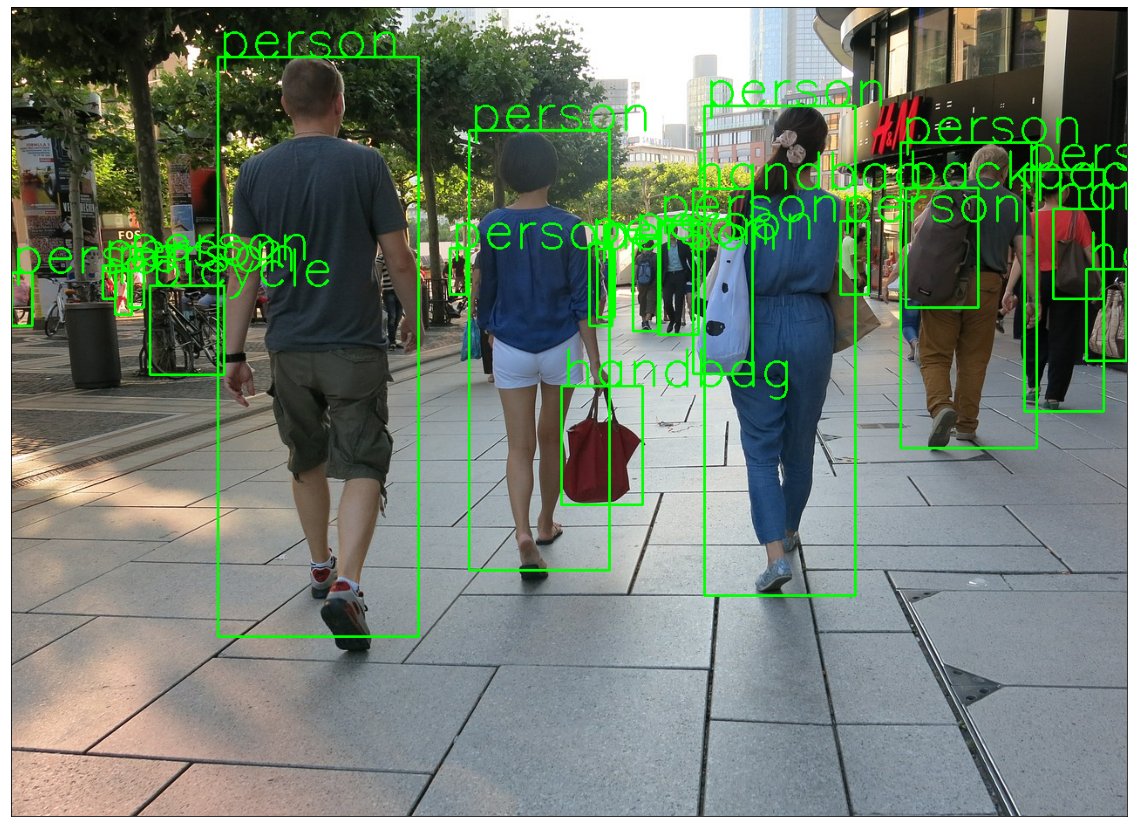

In [21]:
!wget -nv https://storage.needpix.com/rsynced_images/pedestrian-zone-456909_1280.jpg -O pedestrian.jpg

detect_object('pedestrian.jpg', confidence=0.7)